### IS499 CAPSTONE

#### CUNY -SPS

##### By Jack Mei

#### December 13, 2019

A deep dive into the 311 Taxi and Limousine complaint dataset provided by the NYC Open Data Project.

This dataset can vbe retrieved here:
https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9

The data dictionary is avaialbe there this link:
https://data.cityofnewyork.us/api/views/erm2-nwe9/files/68b25fbb-9d30-486a-a571-7115f54911cd?download=true&filename=311_SR_Data_Dictionary_2018.xlsx

#### Import relevent Python modules and packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.rc("savefig", dpi=200)

Due to hardware limitations and the size of the full dataset. 
I had to filter the CSV file first then save a local copy to my drive.

Pandas module have a read_csv() function. We'll create a dataframe "df" from the CSV file.

In [2]:
Location = r'C:\Users\jcsme\Downloads\TLC_COMPLAINTS_2019.csv'
df = pd.read_csv(Location, low_memory = False)

Let's examine the df dataset by using the head() fucntion, which will retrun the fist five rows of data.

In [3]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Incident Zip,City,Status,Resolution Description,Borough,Open Data Channel Type,Vehicle Type,Latitude,Longitude
0,43660022,8/28/2019 0:57,10/29/2019 11:40,TLC,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint - Passenger,10014,NaN,Closed,A representative from the Taxi and Limousine C...,MANHATTAN,PHONE,NaN,40.735538,-74.003341
1,43660895,8/29/2019 0:12,NaN,TLC,Taxi and Limousine Commission,Green Taxi Complaint,Driver Complaint - Passenger,11368,CORONA,In Progress,NaN,QUEENS,ONLINE,NaN,40.754703,-73.845398
2,43661081,8/28/2019 12:59,10/29/2019 12:06,TLC,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint - Non Passenger,10001,NEW YORK,Closed,A representative from the Taxi and Limousine C...,MANHATTAN,ONLINE,NaN,40.748339,-73.988830
3,43661098,8/28/2019 17:44,NaN,TLC,Taxi and Limousine Commission,Green Taxi Complaint,Driver Complaint - Passenger,10029,NEW YORK,In Progress,NaN,MANHATTAN,ONLINE,NaN,40.790558,-73.953814
4,43661817,8/28/2019 22:14,10/29/2019 8:50,TLC,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint - Passenger,10016,NEW YORK,Closed,A representative from the Taxi and Limousine C...,MANHATTAN,ONLINE,NaN,40.750407,-73.977555


Only selected columns are needed. 

Create a copy of new dataframe with selected columns from the df dataset.

In [4]:
tlc = df[['Unique Key', 'Agency','Complaint Type', 'Descriptor', 'Created Date',
          'Closed Date', 'Status', 'Incident Zip', 'Open Data Channel Type',
           'Borough']].copy()

The "Created Date" and the "Closed Date" will be converted to datetime datatype.

In [8]:
tlc['Created Date'] = pd.to_datetime(tlc['Created Date'], errors='coerce')
tlc['Closed Date'] = pd.to_datetime(tlc['Closed Date'], errors='coerce')

Check the minimum date.

In [9]:
min(tlc['Created Date'])

Timestamp('2019-01-01 00:01:00')

Check the maximum date. This is also the date that this data was updated (at the time of this report).

In [10]:
max(tlc['Created Date'])

Timestamp('2019-12-11 00:34:00')

Examine the new dataset.

In [11]:
tlc.head()

,Unique Key,Agency,Complaint Type,Descriptor,Created Date,Closed Date,Status,Incident Zip,Open Data Channel Type,Borough
0,43660022,TLC,Taxi Complaint,Driver Complaint - Passenger,2019-08-28 00:57:00,2019-10-29 11:40:00,Closed,10014,PHONE,MANHATTAN
1,43660895,TLC,Green Taxi Complaint,Driver Complaint - Passenger,2019-08-29 00:12:00,NaT,In Progress,11368,ONLINE,QUEENS
2,43661081,TLC,Taxi Complaint,Driver Complaint - Non Passenger,2019-08-28 12:59:00,2019-10-29 12:06:00,Closed,10001,ONLINE,MANHATTAN
3,43661098,TLC,Green Taxi Complaint,Driver Complaint - Passenger,2019-08-28 17:44:00,NaT,In Progress,10029,ONLINE,MANHATTAN
4,43661817,TLC,Taxi Complaint,Driver Complaint - Passenger,2019-08-28 22:14:00,2019-10-29 08:50:00,Closed,10016,ONLINE,MANHATTAN


We need the year and month from the Created Date to create two new columns; Year and Month.

In [12]:
tlc['Year'], tlc['Month'] = tlc['Created Date'].dt.year, tlc['Created Date'].dt.month

Examine again to see the two columns with Year and date from the created date.

In [13]:
tlc.head()

,Unique Key,Agency,Complaint Type,Descriptor,Created Date,Closed Date,Status,Incident Zip,Open Data Channel Type,Borough,Year,Month
0,43660022,TLC,Taxi Complaint,Driver Complaint - Passenger,2019-08-28 00:57:00,2019-10-29 11:40:00,Closed,10014,PHONE,MANHATTAN,2019,8
1,43660895,TLC,Green Taxi Complaint,Driver Complaint - Passenger,2019-08-29 00:12:00,NaT,In Progress,11368,ONLINE,QUEENS,2019,8
2,43661081,TLC,Taxi Complaint,Driver Complaint - Non Passenger,2019-08-28 12:59:00,2019-10-29 12:06:00,Closed,10001,ONLINE,MANHATTAN,2019,8
3,43661098,TLC,Green Taxi Complaint,Driver Complaint - Passenger,2019-08-28 17:44:00,NaT,In Progress,10029,ONLINE,MANHATTAN,2019,8
4,43661817,TLC,Taxi Complaint,Driver Complaint - Passenger,2019-08-28 22:14:00,2019-10-29 08:50:00,Closed,10016,ONLINE,MANHATTAN,2019,8


### - Fig.1 -
#### The types of complaints by creation date.

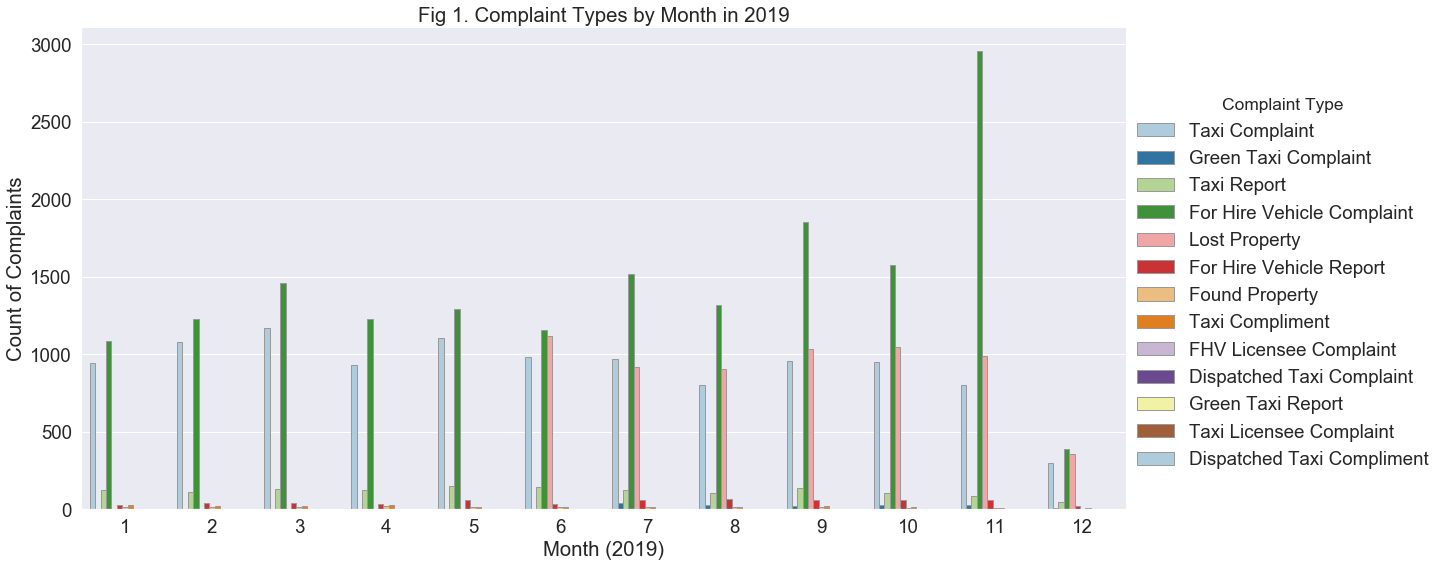

In [16]:
sns.set(font_scale=1.7)
ab = sns.catplot(x = 'Month', hue="Complaint Type", kind="count",
             palette = sns.color_palette("Paired") ,edgecolor=".6", height=8, aspect=2,
            data= tlc)
plt.title('Fig 1. Complaint Types by Month in 2019')
plt.ylabel('Count of Complaints')
plt.xlabel('Month (2019)')
X_date = tlc['Month'].sort_values().unique()

### - Fig. 2 -
#### Each complaint types viewed independently.

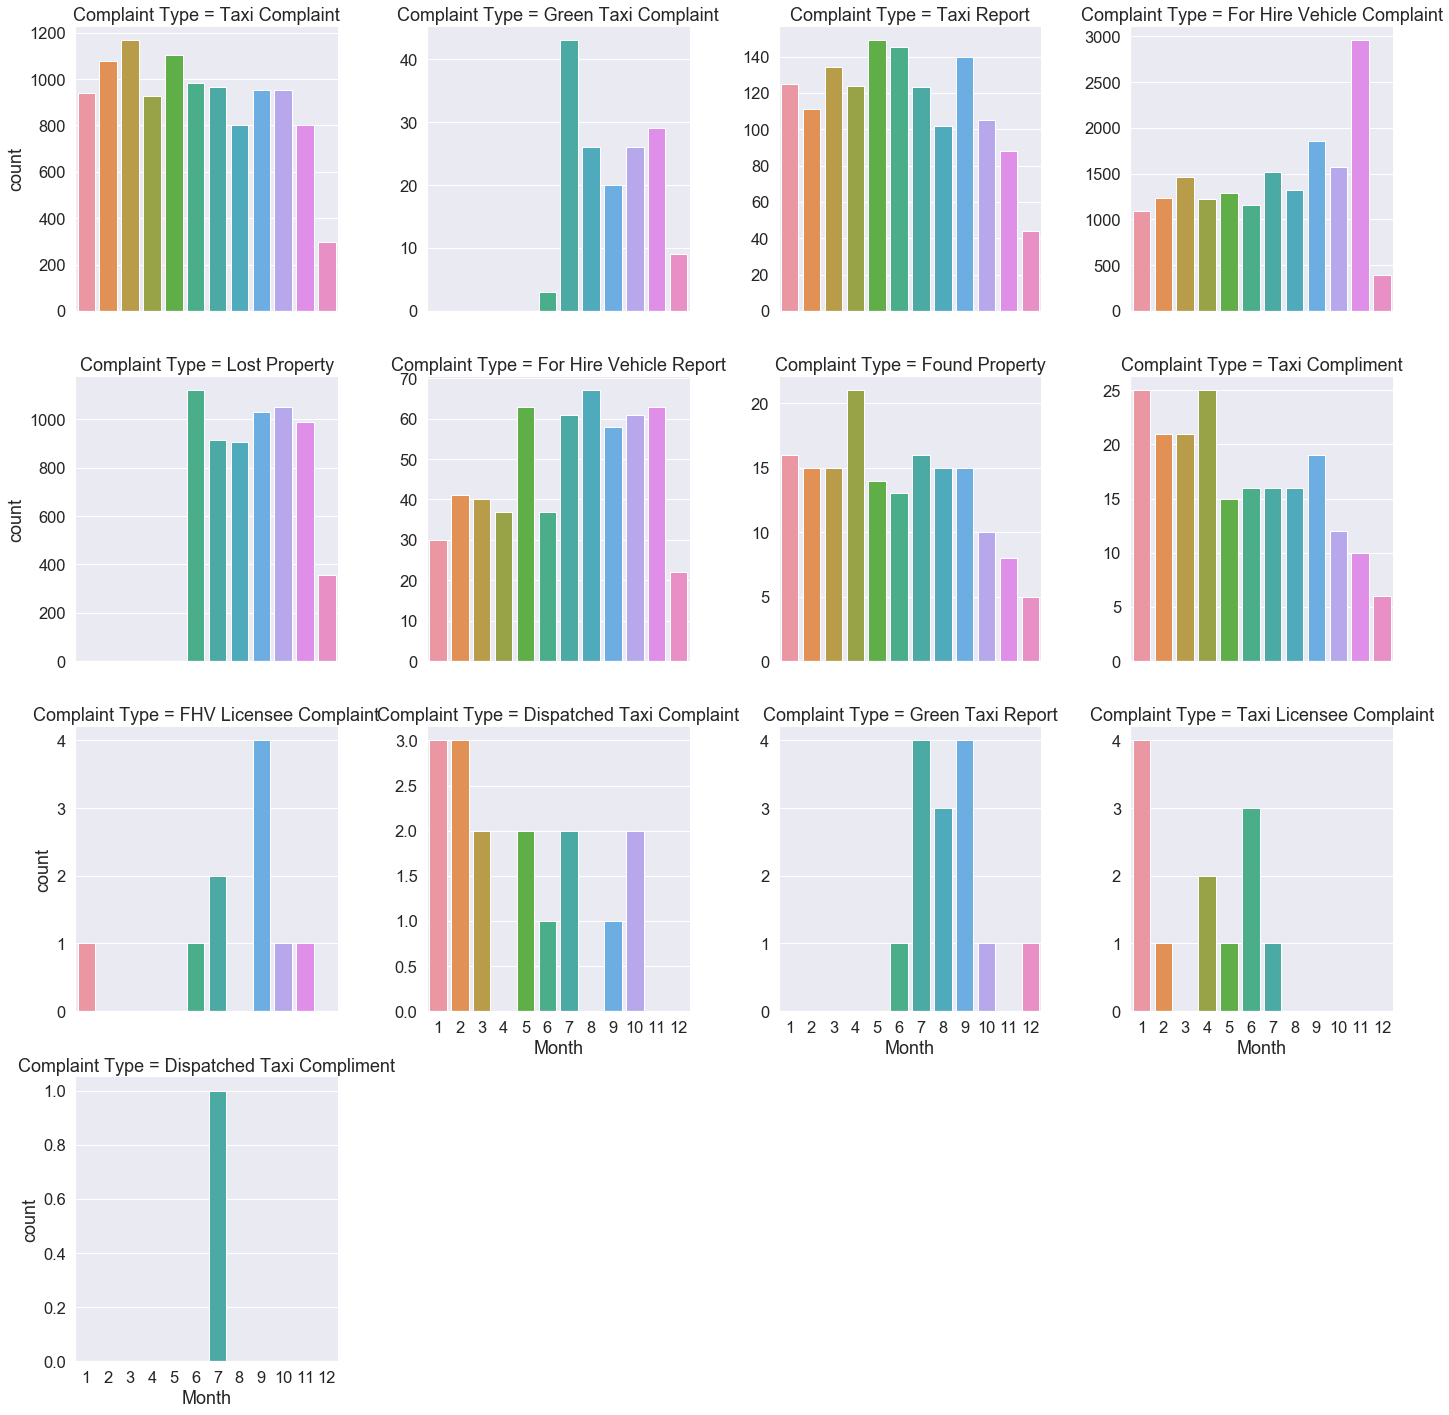

In [33]:
sns.set(font_scale=1.5)
Complaints_Types = sns.catplot(data=tlc
                ,x="Month"
                ,kind="count"
                ,col='Complaint Type'
                ,legend=True
                ,legend_out=True
                ,sharey=False
                ,sharex=True 
                ,col_wrap=4)

### - Fig. 3 - 
#### The total number of the status of complaints.

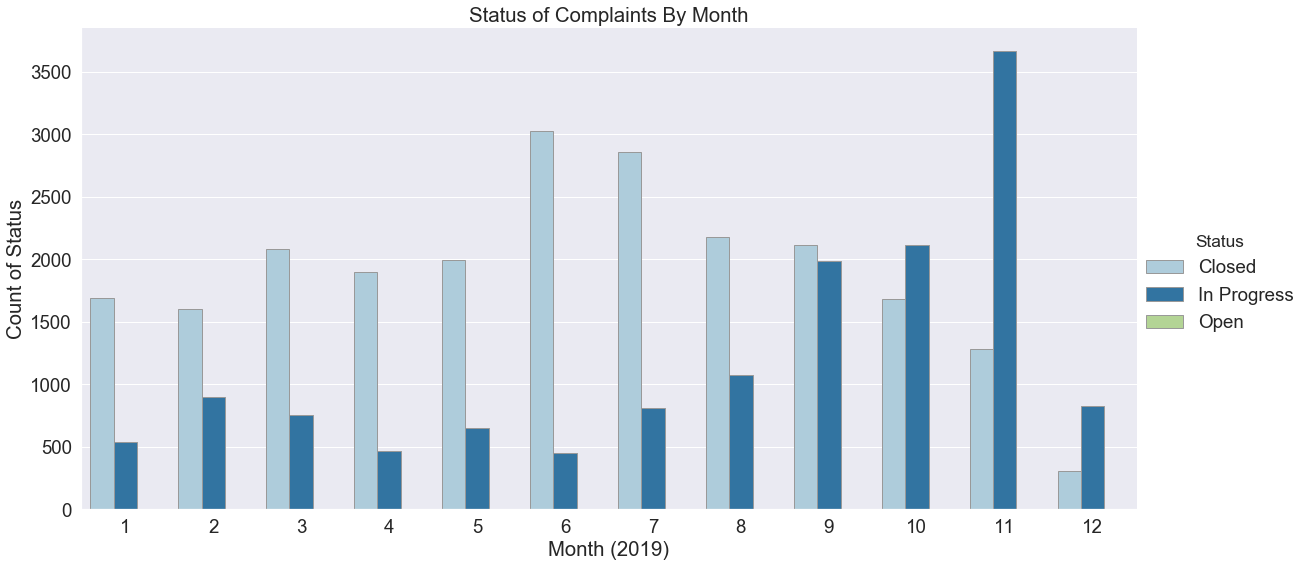

In [45]:
sns.set(font_scale=1.7)

ab = sns.catplot(x = 'Month'
                 ,hue="Status"
                 , kind="count"
                 ,palette = sns.color_palette("Paired")
                 ,edgecolor=".6"
                 ,height=8, aspect=2
                 ,data= tlc)

plt.title('Status of Complaints By Month')
plt.ylabel('Count of Status')
plt.xlabel('Month (2019)')
X_date = tlc['Month'].sort_values().unique()

### - Fig. 4 - 
#### The number of complaint types by status.

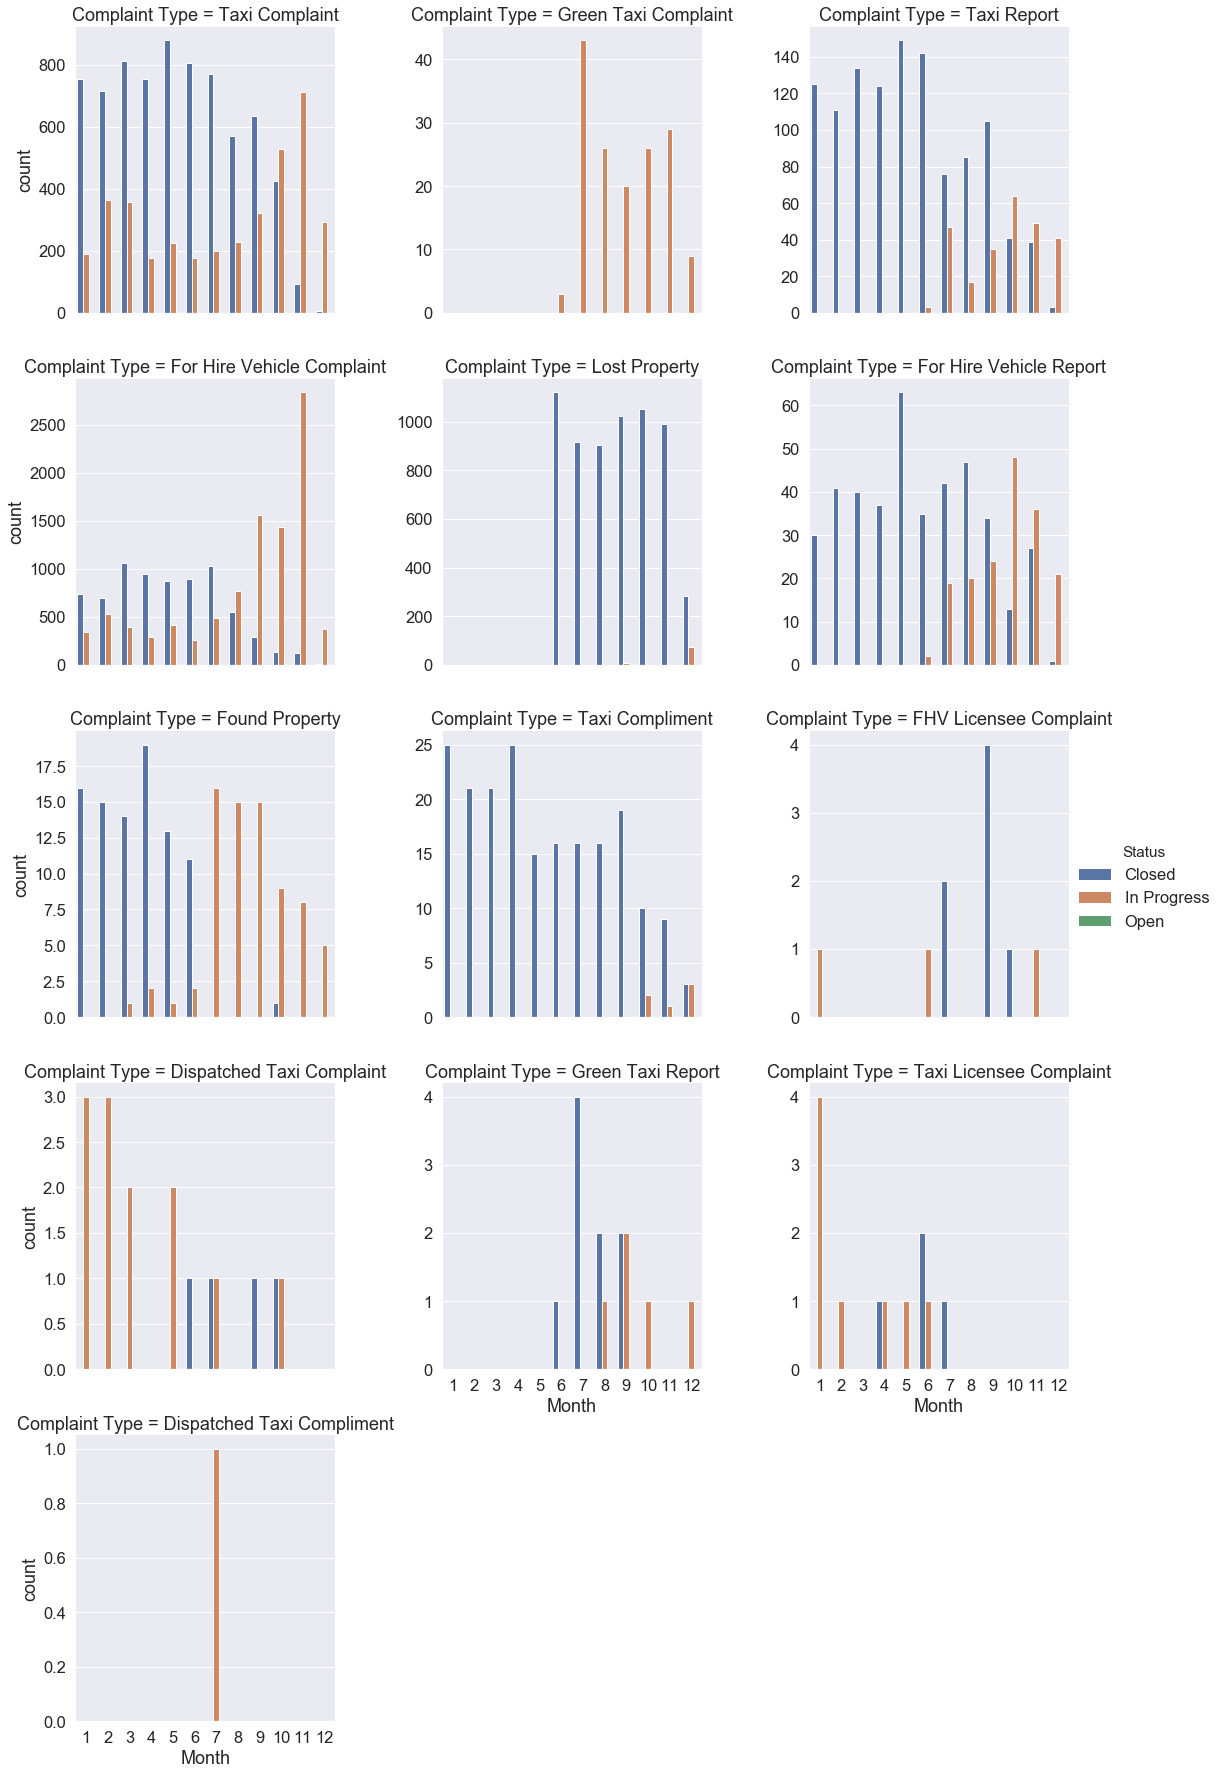

In [39]:
sns.set(font_scale=1.5)
Complaints_Types = sns.catplot(data=tlc
                ,x="Month"
                ,kind="count"
                ,col='Complaint Type'
                ,legend=True
                ,sharey=False
                ,sharex=True 
                ,hue="Status"
                ,col_wrap=3)

### - Fig. 5 - 
#### The method by which the comaints were submitted.

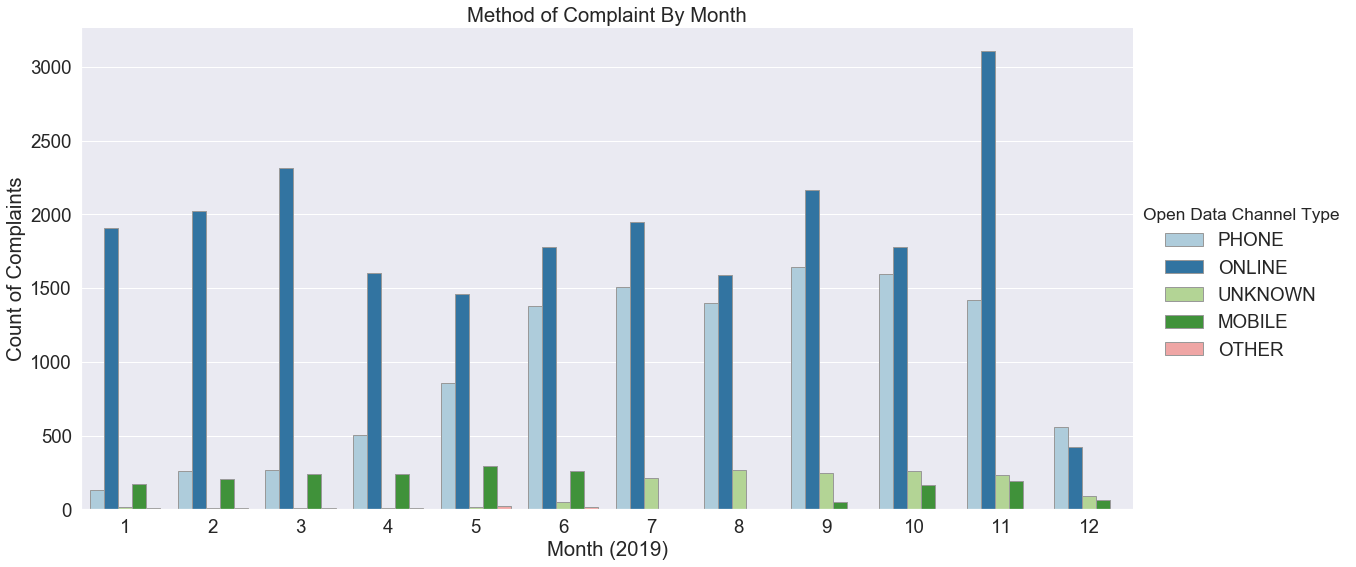

In [40]:
sns.set(font_scale=1.7)

ab = sns.catplot(x = 'Month'
                 ,hue="Open Data Channel Type"
                 , kind="count"
                 ,palette = sns.color_palette("Paired")
                 ,edgecolor=".6"
                 ,height=8, aspect=2
                 ,data= tlc)

plt.title('Method of Complaint By Month')
plt.ylabel('Count of Complaints')
plt.xlabel('Month (2019)')
X_date = tlc['Month'].sort_values().unique()

### - Fig. 6 - 

#### Complaint Types by Borough.

Text(0.5, 41.03200000000004, 'Borough')

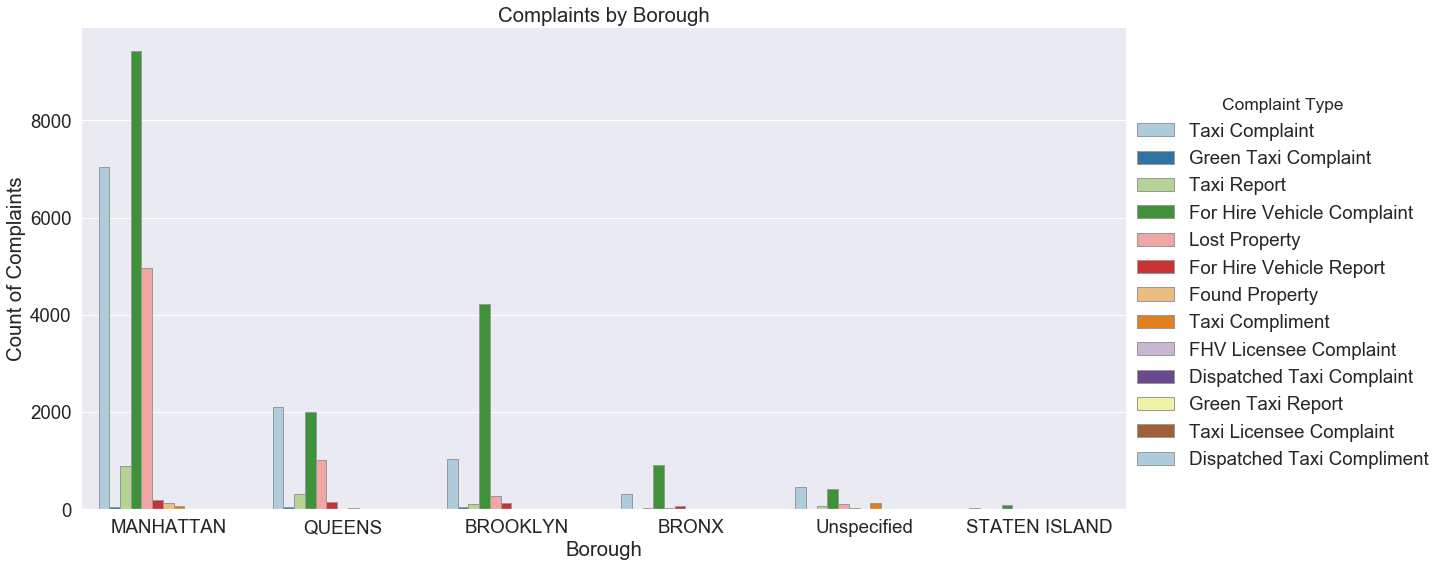

In [41]:
sns.set(font_scale=1.7)

ab = sns.catplot(x = 'Borough'
                 ,hue="Complaint Type"
                 ,kind="count"
                 ,palette = sns.color_palette("Paired")
                 ,edgecolor=".6"
                 ,height=8, aspect=2
                 ,data= tlc)
##ab.set_xticklabels(rotation=90)
plt.title('Complaints by Borough')
plt.ylabel('Count of Complaints')
plt.xlabel('Borough')
##X_date = tlc['Month'].sort_values().unique()

### - Table A -
#### Pivot table summary of compaint types by month.

In [42]:
pd.set_option('display.max_rows', 100)
pvt_table_type = tlc.pivot_table(values='Unique Key'
                            ,index=['Complaint Type']
                            ,columns=['Month']
                            ,aggfunc='count'
                            ,fill_value=0
                            ,margins_name = 'Grand Total'
                            ,margins=True)
pvt_table_type

Month,1,2,3,4,5,6,7,8,9,10,11,12,Grand Total
Complaint Type,,,,,,,,,,,,,
Dispatched Taxi Complaint,3,3,2,0,2,1,2,0,1,2,0,0,16
Dispatched Taxi Compliment,0,0,0,0,0,0,1,0,0,0,0,0,1
FHV Licensee Complaint,1,0,0,0,0,1,2,0,4,1,1,0,10
For Hire Vehicle Complaint,1087,1231,1460,1228,1294,1155,1519,1317,1855,1575,2959,391,17071
For Hire Vehicle Report,30,41,40,37,63,37,61,67,58,61,63,22,580
Found Property,16,15,15,21,14,13,16,15,15,10,8,5,163
Green Taxi Complaint,0,0,0,0,0,3,43,26,20,26,29,9,156
Green Taxi Report,0,0,0,0,0,1,4,3,4,1,0,1,14
Lost Property,0,0,0,0,0,1120,916,906,1032,1050,991,356,6371


### - Table B - 
#### A further breakdown of compalin types, by descriptior, and status of the complaints by month.

In [43]:
pd.set_option('display.max_rows', 100)
pvt_table_status = tlc.pivot_table(values='Unique Key'
                            ,index=['Complaint Type', 'Descriptor', 'Status']
                            ,columns=['Month']
                            ,aggfunc='count'
                            ,fill_value=0
                            ,margins_name = 'Grand Total'
                            ,margins=True)
pvt_table_status

Month                                                                       1  \
Complaint Type             Descriptor                       Status              
Dispatched Taxi Complaint  Driver Complaint                 Closed          0   
                                                            In Progress     2   
                           Driver Complaint - Passenger     In Progress     0   
                           Vehicle Complaint                In Progress     1   
Dispatched Taxi Compliment Driver Compliment                In Progress     0   
FHV Licensee Complaint     Licensee Complaint               Closed          0   
                                                            In Progress     1   
For Hire Vehicle Complaint Car Service Company Complaint    Closed         58   
                                                            In Progress     4   
                                                            Open            1   
                           Driver Complaint                 Closed        579   
                           Driver Complaint - Non Passenger Closed          0   
                                                            In Progress     0   
                           Driver Complaint - Passenger     Closed         78   
                                                            In Progress   340   
                           Driver Report - Non Passenger    Closed          0   
                                                            In Progress     0   
                           Equipment Complaint              Closed          3   
                                                            In Progress     1   
                           Insurance Information Requested  Closed         23   
                                                            In Progress     0   
                           Licensee Complaint               In Progress     0   
For Hire Vehicle Report    Car Service Company Report       Closed         12   
                                                            In Progress     0   
                           Driver Report                    Closed         18   
                           Driver Report - Non Passenger    Closed          0   
                                                            In Progress     0   
                           Driver Report - Passenger        Closed          0   
                                                            In Progress     0   
Found Property             Bag/Wallet                       Closed         10   
                                                            In Progress     0   
                           Book/Stationery                  In Progress     0   
                           Clothing/Glasses                 Closed          3   
                                                            In Progress     0   
                           Electronics/Phones               Closed          2   
                                                            In Progress     0   
                           Jewelry                          Closed          1   
                                                            In Progress     0   
                           Musical Instrument               Closed          0   
                           Other                            Closed          0   
                                                            In Progress     0   
Green Taxi Complaint       Driver Complaint - Non Passenger In Progress     0   
                           Driver Complaint - Passenger     In Progress     0   
                           Insurance Information Requested  In Progress     0   
                           Vehicle Complaint                In Progress     0   
Green Taxi Report          Driver Report - Non Passenger    Closed          0   
                                                            In Progress     0   
                           Driv